In [12]:
import pandas as pd
import numpy as np
import math

In [2]:
data = pd.read_csv("Structured_Data.csv")
data.head()

,Unnamed: 0,Target-20_Open_VET,Target-20_High_VET,Target-20_Low_VET,Target-20_Close_VET,Target-20_Volume_VET,Target-20_Open_BTC,Target-20_High_BTC,Target-20_Low_BTC,Target-20_Close_BTC,...,Target-1_Open_BTC,Target-1_High_BTC,Target-1_Low_BTC,Target-1_Close_BTC,Target-1_Volume_BTC,Target-1_SMA20,Target-1_Upper_Bollinger_Band,Target-1_Lower_Bollinger_Band,Regression_Target,Classification_Target
0,0,0.014743,0.014743,0.013981,0.014535,19980000,6551.520020,6719.959961,6498.640137,6719.959961,...,6317.009766,6363.870117,6265.089844,6351.799805,4064230000,0.016273,0.019782,0.012764,0.014060,1.0
1,1,0.014552,0.015735,0.014244,0.015413,24453700,6719.950195,6789.629883,6700.959961,6763.189941,...,6354.240234,6535.410156,6354.240234,6517.310059,4210910000,0.016249,0.019811,0.012688,0.013978,0.0
2,2,0.015390,0.015446,0.014513,0.015233,20503900,6754.640137,6774.750000,6620.750000,6707.259766,...,6515.410156,6596.100098,6456.169922,6512.709961,4076220000,0.016178,0.019857,0.012499,0.014275,1.0
3,3,0.015222,0.017856,0.015210,0.017824,53968100,6710.799805,6884.640137,6689.709961,6884.640137,...,6509.399902,6561.720215,6493.549805,6543.200195,3216300000,0.016130,0.019879,0.012380,0.014170,0.0
4,4,0.017839,0.018756,0.017549,0.017980,45607800,6891.080078,7109.560059,6882.339844,7096.279785,...,6536.680176,6544.330078,6460.100098,6517.180176,3273730000,0.015947,0.019699,0.012196,0.012725,0.0


In [13]:
y = np.asarray(data["Classification_Target"])
X = np.asarray(data.drop(columns=["Regression_Target", "Classification_Target"]))

cutoff = math.floor(len(y) * 0.8)

y_train = y[:cutoff]
y_test = y[cutoff:]
X_train = X[:cutoff]
X_test = X[cutoff:]

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

clf = DecisionTreeClassifier(random_state=0)

print (cross_val_score(clf, X, y, cv=3).mean())

0.4877629825067678


              precision    recall  f1-score   support

         0.0       0.45      0.50      0.47       102
         1.0       0.56      0.51      0.53       127

    accuracy                           0.51       229
   macro avg       0.51      0.51      0.50       229
weighted avg       0.51      0.51      0.51       229



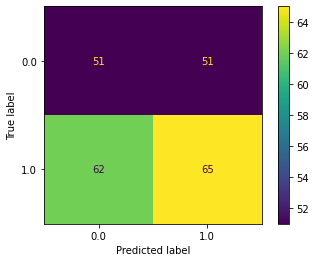

In [26]:
clf = DecisionTreeClassifier(random_state=0)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

# Decision Tree

## False Success
The random forest with max depth of 2 is able to achieve decent success by just always predicting green candles...

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       102
         1.0       0.55      1.00      0.71       127

    accuracy                           0.55       229
   macro avg       0.28      0.50      0.36       229
weighted avg       0.31      0.55      0.40       229



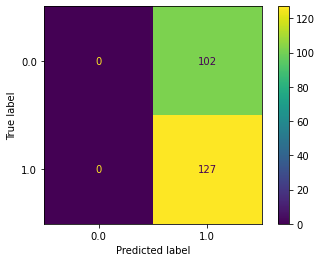

In [61]:
clf = RandomForestClassifier(max_depth=2, random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

## Hyperparameter Optimization

In [39]:
from sklearn.ensemble import RandomForestClassifier

hist = []
for md in range(1, 20):
    for nest in range(50, 251, 10):
        clf = RandomForestClassifier(n_estimators = nest, max_depth=md, random_state=0)
        score = cross_val_score(clf, X, y, cv=3).mean()
        hist.append([md, nest, score])

hist = np.asarray(hist)


### Plotting Grid Search

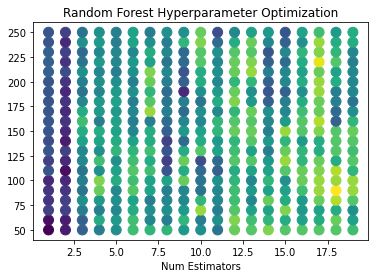

In [46]:
plt.scatter(x=hist[:, 0], y=hist[:,1], c=hist[:, 2], s=100)
plt.xlabel('Max Depth')
plt.xlabel('Num Estimators')
plt.title('Random Forest Hyperparameter Optimization')
plt.show()

### Selecting Best Hyperparams

In [58]:
best_max_depth, best_n_est, best_cv = hist[np.argmax(hist[:,2])]
print(best_max_depth, best_n_est, best_cv)

18.0 90.0 0.5052607952801712


### Train new random forest on optimized hyperparams

              precision    recall  f1-score   support

         0.0       0.43      0.60      0.50       102
         1.0       0.52      0.35      0.42       127

    accuracy                           0.46       229
   macro avg       0.47      0.48      0.46       229
weighted avg       0.48      0.46      0.46       229



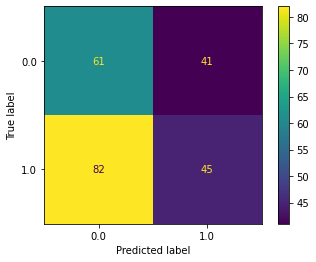

In [59]:
clf = RandomForestClassifier(max_depth=int(best_max_depth), n_estimators=int(best_n_est), random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

plot_confusion_matrix(clf, X_test, y_test)  
plt.show()